In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import StandardScaler

plt.style.use("ggplot")
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

from plotly.subplots import make_subplots
import plotly.graph_objects as go

from yellowbrick.target import FeatureCorrelation
from scipy.stats import norm
from scipy import stats

from wordcloud import WordCloud

import warnings
from yellowbrick.features import JointPlotVisualizer


from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

import plotly.express as px
warnings.filterwarnings("ignore")
color = sns.color_palette()
color_pal = [x['color'] for x in plt.rcParams['axes.prop_cycle']]
%matplotlib inline
import plotly.io as pio
pio.renderers.default = 'sphinx_gallery' # or 'notebook' or 'colab' or 'jupyterlab'

In [2]:
df = pd.read_csv("./data/features/features.csv")\
       .drop(columns=['title'])\
       .sample(frac=1)\
       .reset_index(drop=True)

df = df.apply(pd.to_numeric)
feat_cols=[ 'happiness', 'danceability', 'energy', 'acousticness',
           'instrumentalness', 'speechiness']

df['valence'] = df['happiness']

feat_cols=[ 'valence', 'danceability', 'energy', 'acousticness',
           'instrumentalness', 'speechiness']
df.drop(columns=['happiness'], inplace=True)

<AxesSubplot:title={'center':'Distribuzione degli indici di popolarità'}, xlabel='popularity', ylabel='Density'>

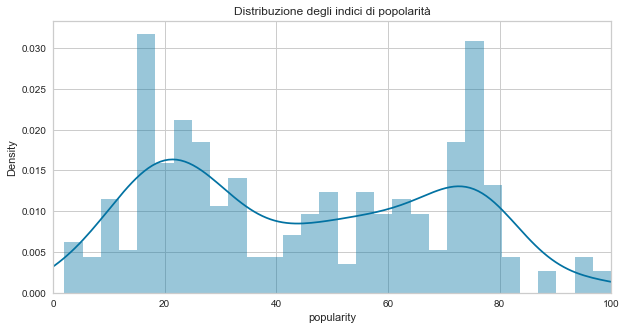

In [3]:
plt.figure(figsize=(10,5))
plt.xlim(0, 100)
plt.title("Distribuzione degli indici di popolarità")
sns.distplot(df['popularity'], bins=30)

# Penso che sia opportuno inserire la tabella delle correlazioni tra feature/popularity

<AxesSubplot:>

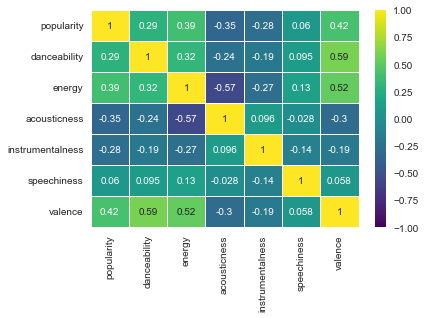

In [4]:
cor = df.corr()
sns.heatmap(cor, annot=True,  linewidths=.5, cmap="viridis", vmin=-1)

# Inserirei per ogni feature la distribuzione.


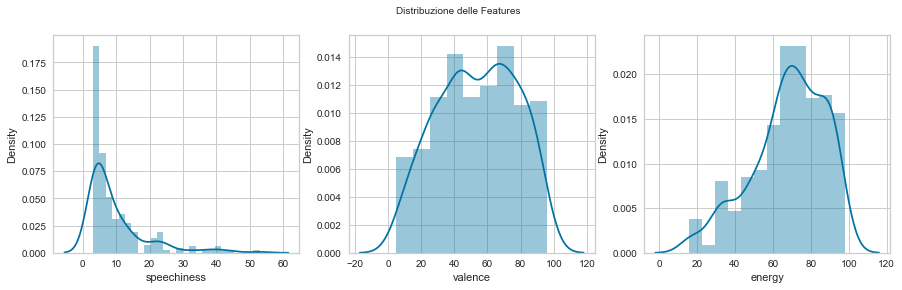

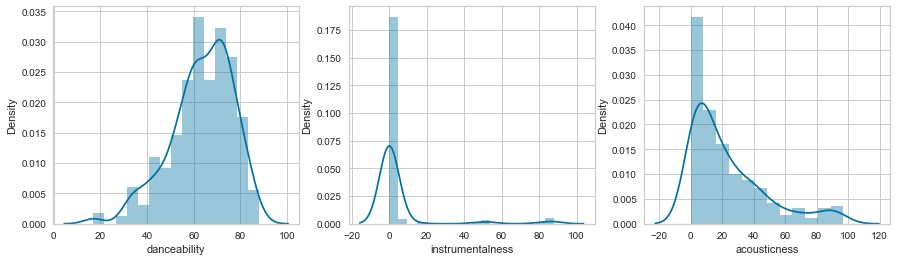

In [5]:
plt.rcParams['figure.figsize'] = (15, 4)

plt.subplot(1, 3, 1)
sns.distplot(df['speechiness'])

plt.subplot(1, 3, 2)
sns.distplot(df['valence'])

plt.subplot(1, 3, 3)
sns.distplot(df['energy'])

plt.suptitle('Distribuzione delle Features', fontsize = 10)
plt.show()

plt.subplot(1, 3, 1)
sns.distplot(df['danceability'])


plt.subplot(1, 3, 2)
sns.distplot(df['instrumentalness'])

plt.subplot(1, 3, 3)
sns.distplot(df['acousticness'])
plt.show()

# Inserirei per ogni feature la distribuzione e il grafico feature vs mean popularity.

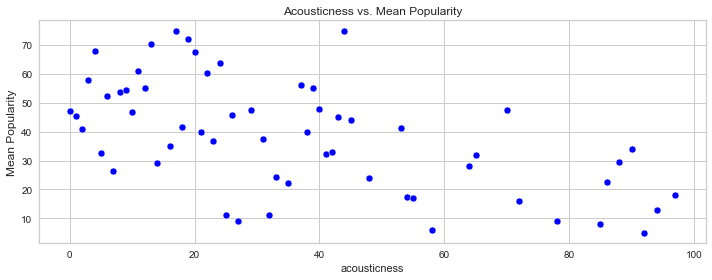

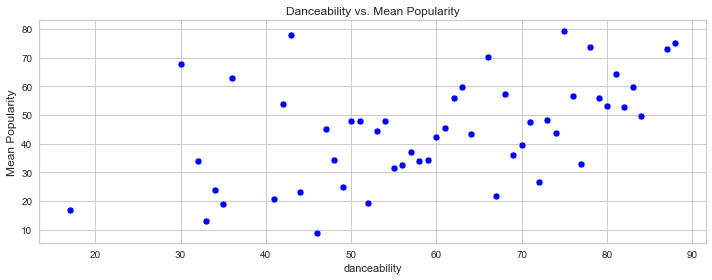

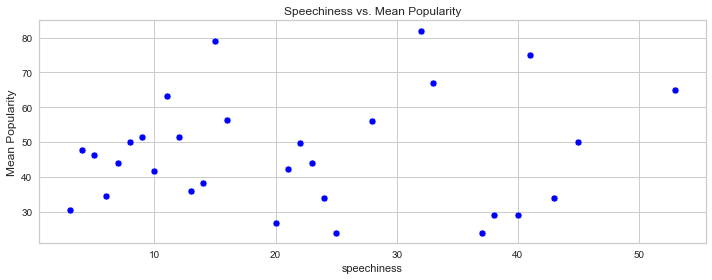

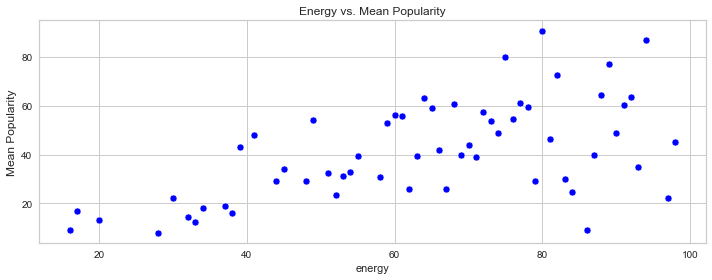

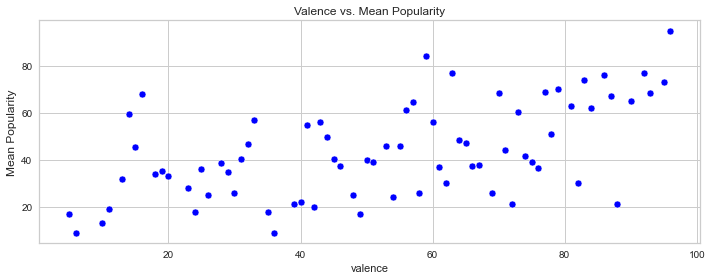

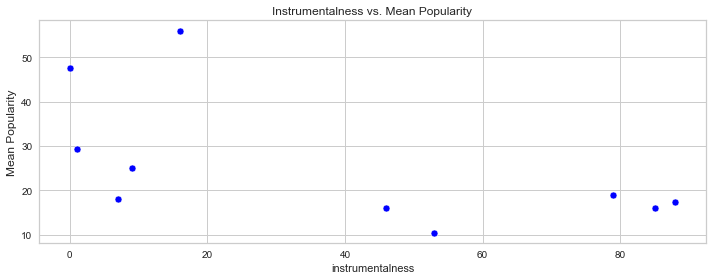

In [6]:
#@title
fig, ax = plt.subplots(figsize=(10, 4))
ax1_data =  df.groupby('acousticness')['popularity'].mean().to_frame()
ax = sns.scatterplot(x='acousticness', y='popularity', data=ax1_data, color='blue', ax=ax)
ax.set_title('Acousticness vs. Mean Popularity')
ax.set_ylabel('Mean Popularity', fontsize=12)
plt.tight_layout()
plt.show()


fig, ax = plt.subplots(figsize=(10, 4))
ax1_data =  df.groupby('danceability')['popularity'].mean().to_frame()
ax = sns.scatterplot(x='danceability', y='popularity', data=ax1_data, color='blue', ax=ax)
ax.set_title('Danceability vs. Mean Popularity')
ax.set_ylabel('Mean Popularity', fontsize=12)
plt.tight_layout()
plt.show()

#@title
fig, ax = plt.subplots(figsize=(10, 4))
ax1_data =  df.groupby('speechiness')['popularity'].mean().to_frame()
ax = sns.scatterplot(x='speechiness', y='popularity', data=ax1_data, color='blue', ax=ax)
ax.set_title('Speechiness vs. Mean Popularity')
ax.set_ylabel('Mean Popularity', fontsize=12)
plt.tight_layout()
plt.show()

#@title
fig, ax = plt.subplots(figsize=(10, 4))
ax1_data =  df.groupby('energy')['popularity'].mean().to_frame()
ax = sns.scatterplot(x='energy', y='popularity', data=ax1_data, color='blue', ax=ax)
ax.set_title('Energy vs. Mean Popularity')
ax.set_ylabel('Mean Popularity', fontsize=12)
plt.tight_layout()
plt.show()

#@title
fig, ax = plt.subplots(figsize=(10, 4))
ax1_data =  df.groupby('valence')['popularity'].mean().to_frame()
ax = sns.scatterplot(x='valence', y='popularity', data=ax1_data, color='blue', ax=ax)
ax.set_title('Valence vs. Mean Popularity')
ax.set_ylabel('Mean Popularity', fontsize=12)
plt.tight_layout()
plt.show()

#@title
fig, ax = plt.subplots(figsize=(10, 4))
ax1_data =  df.groupby('instrumentalness')['popularity'].mean().to_frame()
ax = sns.scatterplot(x='instrumentalness', y='popularity', data=ax1_data, color='blue', ax=ax)
ax.set_title('Instrumentalness vs. Mean Popularity')
ax.set_ylabel('Mean Popularity', fontsize=12)
plt.tight_layout()
plt.show()

# Correlazione tra popularity e features

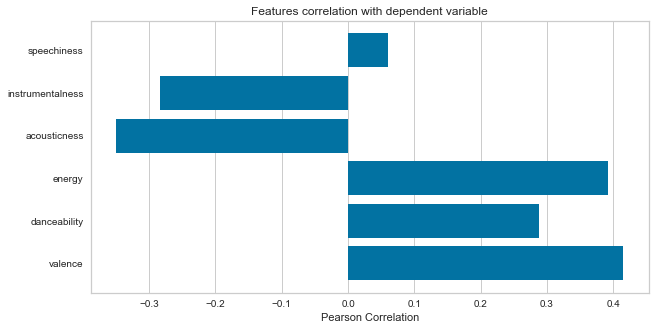

<Figure size 360x144 with 0 Axes>

In [7]:

X, y = df[feat_cols], df['popularity']

# Create a list of the feature names

fig = plt.figure(figsize=(10,5))
features = np.array(feat_cols)

# Instantiate the visualizer
visualizer = FeatureCorrelation(labels=features)

plt.rcParams['figure.figsize']=(5,2)
visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()       
plt.tight_layout()
fig.savefig("corr.jpg", dpi=120)

# La parte relativa a feature importance la possiamo ottenere? Si trova nella parte finale 
# Anche qui ho apprezzato il grafico su feature importance con F score (sono concetti più apprezzabili per i professori del corso)

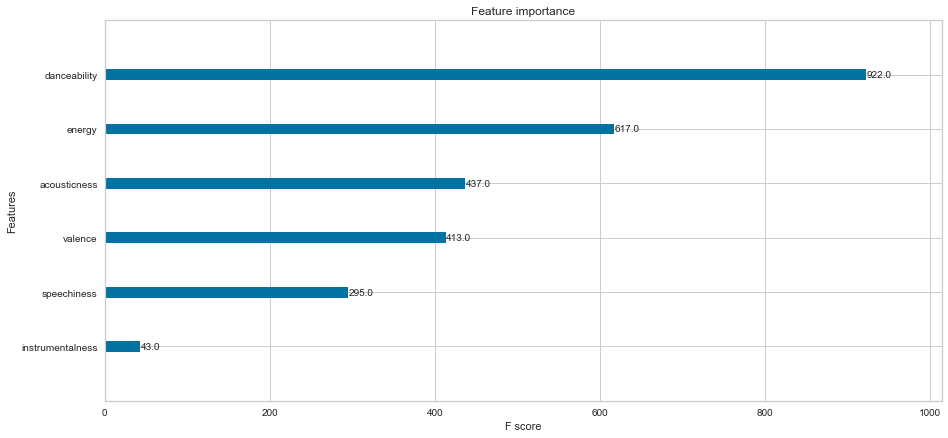

In [8]:
from numpy import loadtxt
from xgboost import XGBRegressor, XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot

y = df["popularity"].values
x_data=df.drop(["popularity"],axis=1)
#normalization
x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data)).values#train test split

model = XGBRegressor()
model.fit(x, y)

# plot feature importance
ax = plot_importance(model)
fig = ax.figure
fig.set_size_inches(15, 7)
#plot_importance(model)
pyplot.show()

[16:08:03] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


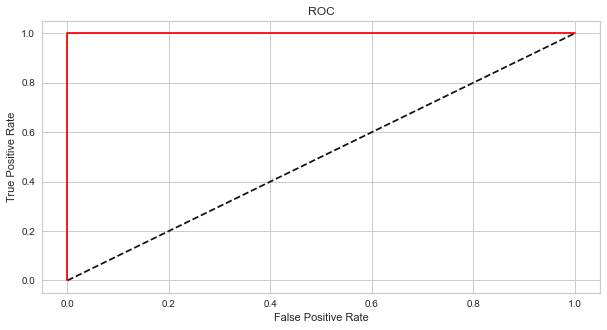

In [9]:
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
logreg = LogisticRegression()


model = XGBClassifier()

model.fit(x.to_numpy(),((y >= 50)*1).reshape(-1,1))
y_pred_prob = model.predict_proba(x.to_numpy())[:,1]
fpr, tpr, thresholds = roc_curve(((y >= 50)*1).reshape(-1,1), y_pred_prob)

# Plot ROC curve
fig = plt.figure(figsize=(10,5))

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr,color="red")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

Text(0.5, 0, 'Popularity')

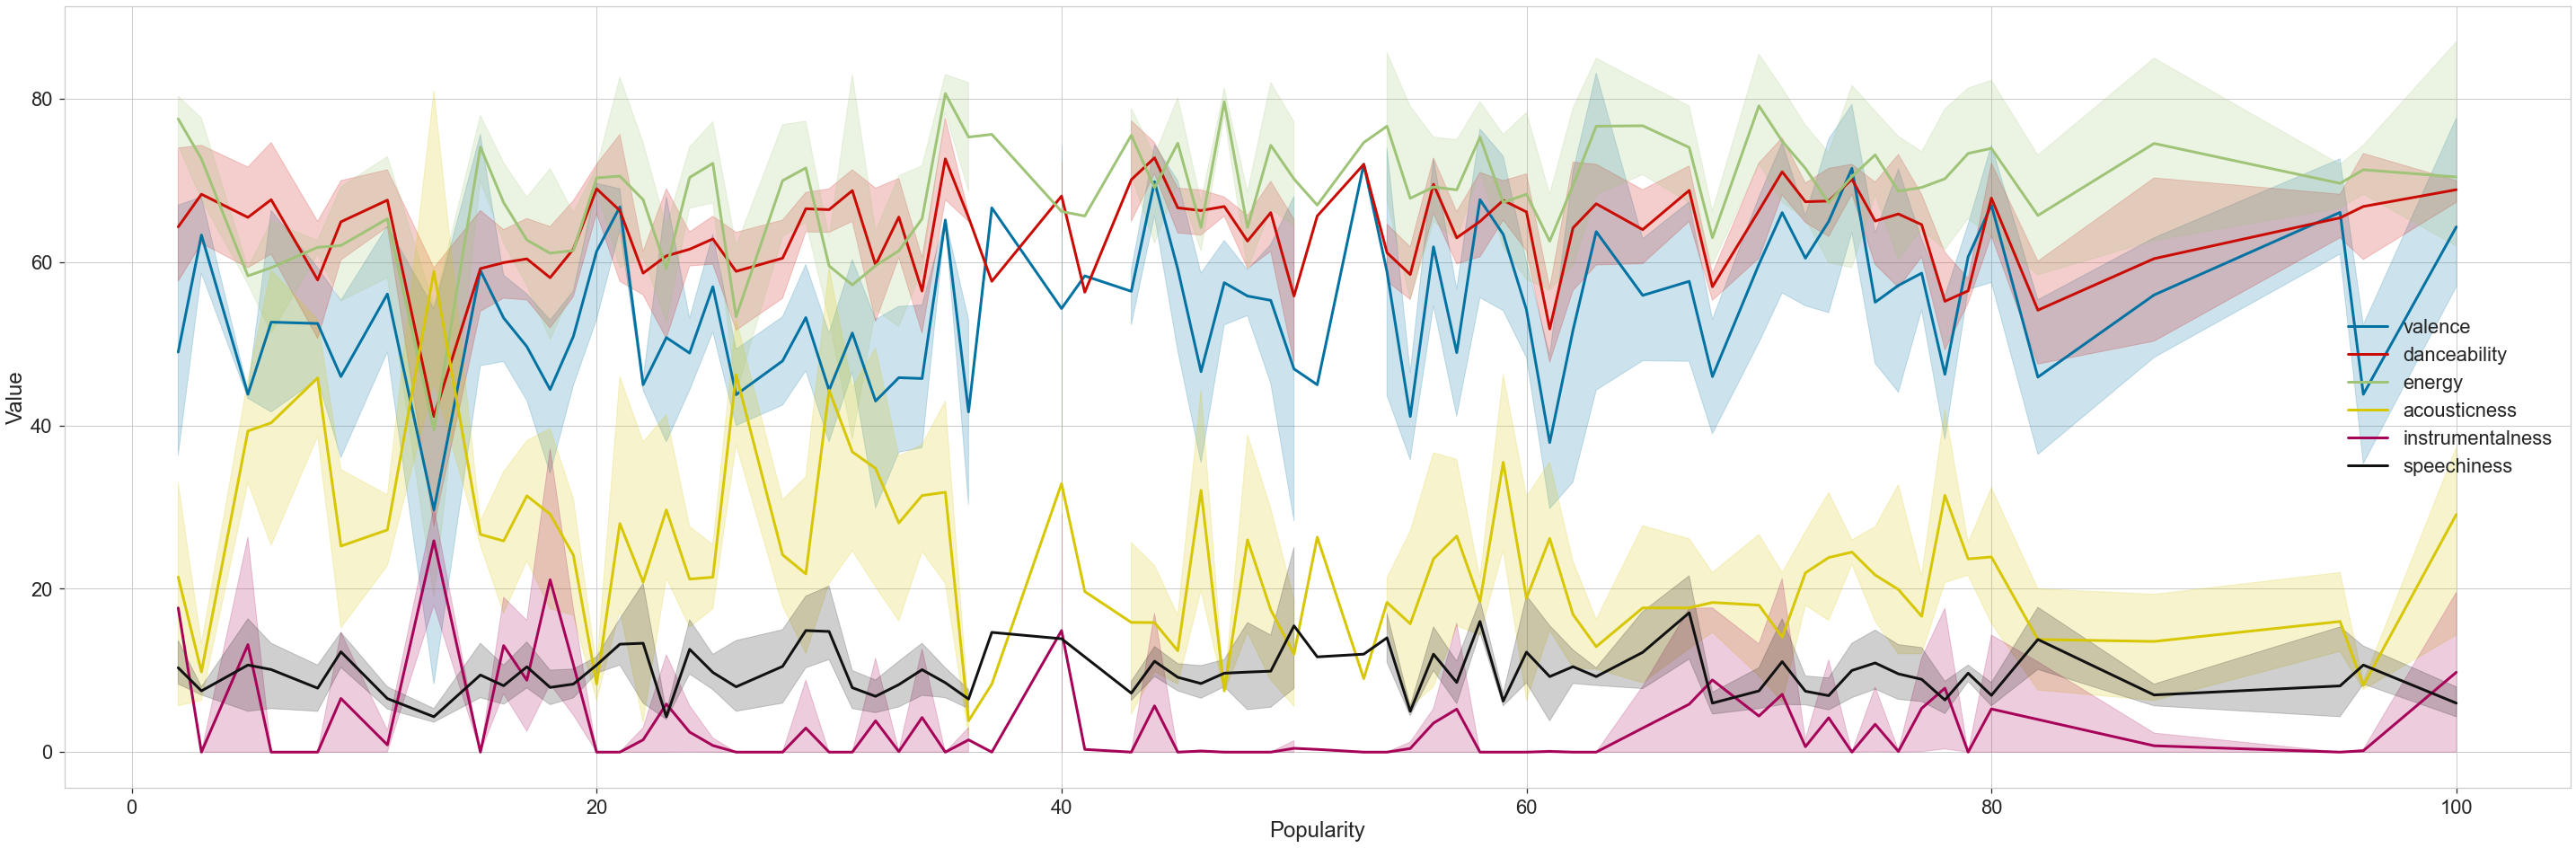

In [10]:
plt.rcParams['figure.figsize'] = (50, 16)
fig = plt.figure()
sns.despine(fig, left=True, bottom=True)
sns.set_context("notebook", font_scale=2, rc={"lines.linewidth": 3})


df['val_emw'] = df.valence.rolling(3).mean().shift(0)
df['dan_emw'] = df.danceability.rolling(3).mean().shift(0)
df['ene_emw'] = df.energy.rolling(3).mean().shift(0)
df['aco_emw'] = df.acousticness.rolling(3).mean().shift(0)
df['ins_emw'] = df.instrumentalness.rolling(3).mean().shift(0)
df['spe_emw'] = df.speechiness.rolling(3).mean().shift(0)


sns.lineplot(x="popularity", y="val_emw", data=df, color="b",label = 'valence')
sns.lineplot(x="popularity", y="dan_emw", data=df, color="r",label = 'danceability')
sns.lineplot(x="popularity", y="ene_emw", data=df, color="g",label = 'energy')
sns.lineplot(x="popularity", y="aco_emw", data=df, color="y",label = 'acousticness')
sns.lineplot(x="popularity", y="ins_emw", data=df, color="m",label = 'instrumentalness')
sns.lineplot(x="popularity", y="spe_emw", data=df, color="k",label = 'speechiness')

plt.rcParams["xtick.labelsize"] = 15

plt.ylabel('Value')
plt.xlabel('Popularity')

# Soluzioni grafiche per ottenere informazioni che permettano di affermare che per valori x di una feature è più o meno probabile che la track sia popolare

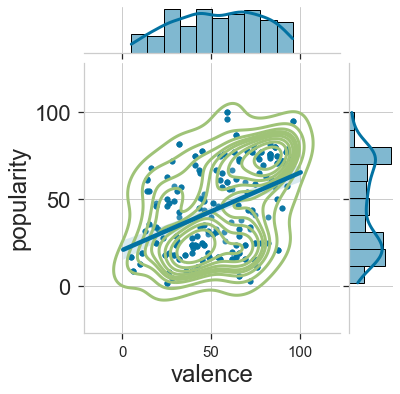

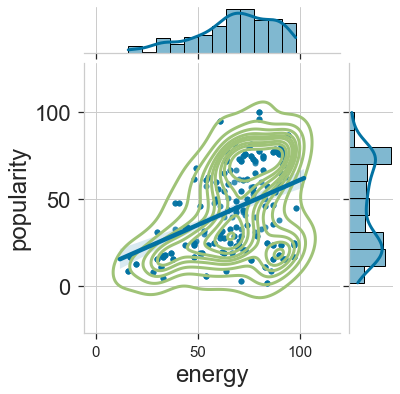

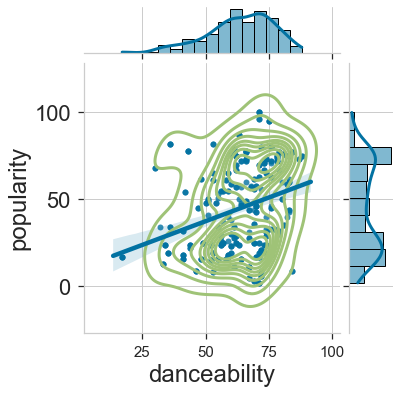

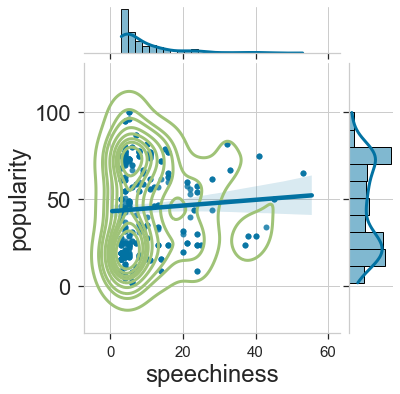

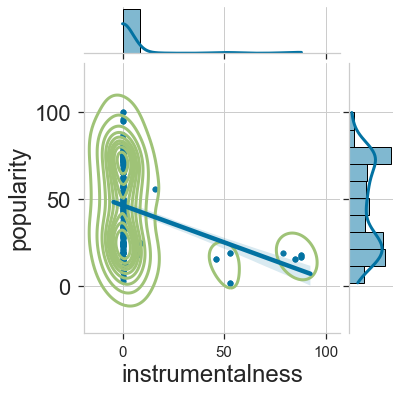

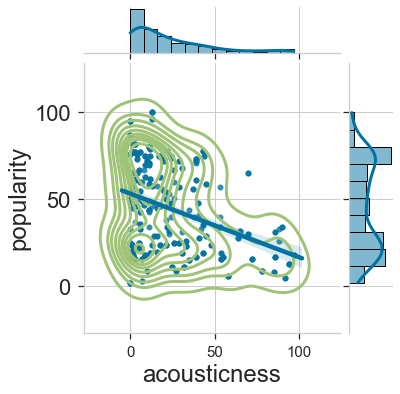

In [11]:

plt.rcParams['figure.figsize'] = (15, 4)

a = sns.jointplot(x="valence", y="popularity", data=df,
                  kind="reg", color="b", truncate=False)
a.plot_joint(sns.kdeplot, color="g")


a= sns.jointplot(x="energy", y="popularity", data=df,
                  kind="reg",color="b", truncate=False)
a.plot_joint(sns.kdeplot, color="g")


a= sns.jointplot(x="danceability", y="popularity", data=df,
                  kind="reg",color="b", truncate=False)
a.plot_joint(sns.kdeplot, color="g")


a= sns.jointplot(x="speechiness", y="popularity", data=df,
                  kind="reg", color="b",truncate=False)
a.plot_joint(sns.kdeplot, color="g")


a=sns.jointplot(x="instrumentalness", y="popularity", data=df,
                  kind="reg", color="b",truncate=False)
a.plot_joint(sns.kdeplot, color="g")

a=sns.jointplot(x="acousticness", y="popularity", data=df,
                  kind="reg", color="b",truncate=False)
a.plot_joint(sns.kdeplot, color="g")


,valence,danceability,energy,acousticness,instrumentalness,speechiness
0,90,78,71,10,0,14
1,67,60,90,21,0,3
2,32,36,68,3,0,10
3,25,71,55,9,0,16
4,69,64,87,7,46,3
...,...,...,...,...,...,...
342,26,60,67,1,79,4
343,69,74,87,1,0,16
344,86,64,76,53,0,13
345,83,78,82,24,0,11


In [29]:
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3)

regr = DecisionTreeRegressor(max_depth=20, random_state=1234)
model = regr.fit(X_train, y_train)

In [30]:
regr.score(X_test,y_test)

0.7109677679120228

In [38]:
from supervised.automl import AutoML


ImportError: cannot import name 'run' from 'graphviz.backend' (/Users/ince/Library/Python/3.7/lib/python/site-packages/graphviz/backend/__init__.py)

In [ ]:
automl = AutoML(total_time_limit=5*60)
automl.fit(X_train, y_train)